<a href="https://colab.research.google.com/github/Sriharshitha842/DWDM_LAB/blob/main/DWDM_LAB14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NAME OF THE STUDENT : SRIHARSHITHA D**
## **REG NO : 19BCD7246**
## **COURSE CODE : CSE4005**
## **LAB NO : 14**

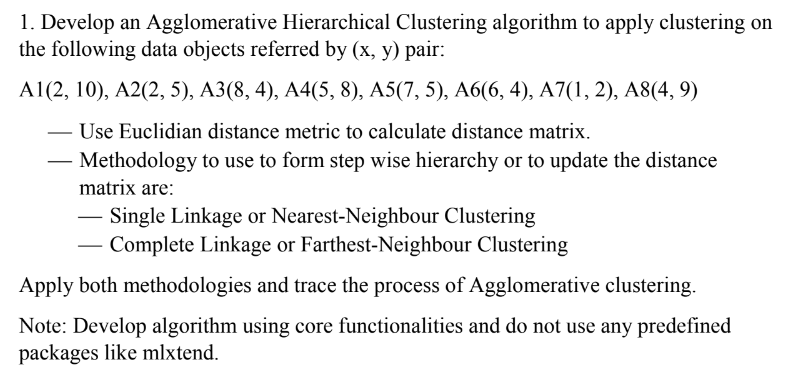

Select the linkage method:
1 :  Single
2 :  Complete
3 :  Compare all the above linkage methods
Enter your choice: 3

How do you want to run the algorithm: 
1: Enter a value of number of clusters manually (>1)
2: Run for all cluster numbers from 2 to 10
Enter your choice (1/2): 1

Enter the number of clusters: 3
single


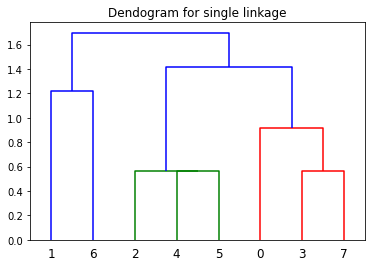

complete


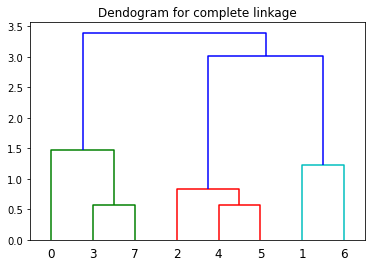

Silhouette score for k (single linkage):
3	:	 0.5670103843363123
Silhouette score for k (complete linkage):
3	:	 0.5670103843363123


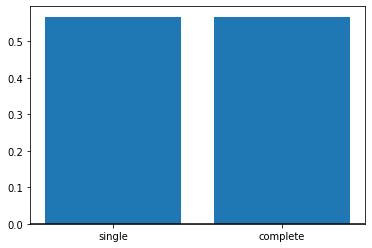

In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn import metrics
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

arr = np.array([[2, 10],[2, 5],[8, 4],[5, 8],[7, 5],[6, 4],[1, 2],[4, 9]])
df = pd.DataFrame(arr, columns =['X','Y'])

def agglomerative_hierarchical_clustering():
    linkage_methods = ['single', 'complete']

    print('Select the linkage method:')

    for i, linkage in enumerate(linkage_methods):
        print(i + 1, ': ', linkage.capitalize())
    print(len(linkage_methods) + 1, ': ', 'Compare all the above linkage methods')

    index = int(input('Enter your choice: '))

    if index in range(1, len(linkage_methods) + 1):
        linkage_method = [linkage_methods[index-1]]
    elif index == len(linkage_methods) + 1:
        linkage_method = linkage_methods
    else:
        raise_value_error('Linkage Method')

    print('\nHow do you want to run the algorithm: ')
    print('1: Enter a value of number of clusters manually (>1)')
    print('2: Run for all cluster numbers from 2 to 10')

    mode = int(input('Enter your choice (1/2): '))

    if mode == 1:
        cluster_count = int(input('\nEnter the number of clusters: '))
        run_algorithm(linkage_method, cluster_count)
    elif mode == 2:
        run_algorithm(linkage_method)


def run_algorithm(linkages, cluster_count=0):

    def run_algorithm_for_k(k, linkage):
        cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=linkage)
        cluster.fit(x)
        score = (metrics.silhouette_score(x, cluster.labels_, metric='euclidean'))
        silhouette_scores.append(score)
    x = df.values
    # Apply pre-processing to scale all the values to have approx. same mean and S.D.
    x = preprocessing.scale(x)
    for linkage in linkages:
        print(linkage)
        plt.title('Dendogram for ' + linkage + ' linkage')
        shc.dendrogram(shc.linkage(x, method=linkage), truncate_mode='level', p=5, show_contracted=True)
        plt.show()

    if cluster_count == 0:
        for i, linkage in enumerate(linkages):
            silhouette_scores = []
            print('Silhouette score for k (' + linkage + 'linkage):')

            for k in range(2, 11):
                run_algorithm_for_k(k, linkage)
                print(str(k) + '\t:\t', silhouette_scores[k-2])

            plt.plot(range(2, 11), silhouette_scores, label=linkage)
            plt.title('Comparison among various k values for linkage')
            plt.xlabel('No. of clusters')
            plt.ylabel('Score')
            plt.legend()
    else:
        silhouette_scores = []
        for i, linkage in enumerate(linkages):
            print('Silhouette score for k (' + linkage + ' linkage):')
            run_algorithm_for_k(cluster_count, linkage)
            print(str(cluster_count) + '\t:\t', silhouette_scores[i])

        plt.bar(linkages, silhouette_scores)
        plt.axhline(y=0, color='k')
        plt.yticks()
    plt.show()


if __name__ == '__main__':
    agglomerative_hierarchical_clustering()